intro: What makes a strong password and why should the IT/infrastructure leaders analyze yearly leaked password datasets
- Question: What is the leaked password trend for 2020? 
    - average, max, min length of leaked string
    - average, max, min time to crack in seconds
    - correlation between length of string and time to crack?
    - were there any passwords that meets strong req leaked (special char, upper, lower, num, len >12)?
    - what is more important, length, or mix of characters
    - Of the passwords on the data set, did it take longer to crack in the previous years or did the time to crack stay the same?
- Future: Companies should continue to analyze the password trends yearly to see if password reqs should be updated
    - Is there a change in average length of password by years? => if yes increase the min password length

<p><a name="sections"></a></p>


# Sections

- <a href="#SettingUp">Setting up + basic df info</a>
    - <a href="#AddingPws">Adding Password_Length Column</a>
- <a href="#Compcountry">Comparing by countries</a>
    - <a href="#countryusrcount">How many users in each country were found to have used passwords on the list</a>
    - <a href="#countrylengthvsttcis">What is the average password length by country?</a>
    - <a href="#countryavgttcis">What is the average time to crack the password by country?</a>
    - <a href="#countrysharetoppass">Do different countries share same top used passwords (Top 3)</a>
- <a href="#uniqpwd">Analysis of unique passwords</a>
    - <a href="#uniqdissect">Dissecting unique passwords by character type</a>
- <a href="#pwdcomplex">Analysis by Password Complexity</a>
    - <a href="#strongpwdele">Comparing the elements that make a strong password using boxplot</a>
    - <a href="#onecomplextype">Of the unique passwords, what percentage has only one complexity type</a>
    - <a href="#TTCISbyyear">Of the unique passwords in the list, has the crack time changed from the past years? [do passwords get easier to crack over time?]</a>

<p><a name="SettingUp"></a></p>

# ------- Setting up + basic df info -------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.axis import Axis
import math
plt.style.use('ggplot')

In [2]:
pw = pd.read_csv('pw_updated.csv')
pw

,Unnamed: 0,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds
0,0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0
1,1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0
2,2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0
3,3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0
4,4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0
...,...,...,...,...,...,...,...,...,...
9795,9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0
9796,9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0
9797,9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0
9798,9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0


In [3]:
# removing the Unnamed: 0 column
pw = pw.drop(columns=["Unnamed: 0"])

In [4]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0
1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0
2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0
3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0
4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0
...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0


In [5]:
# to see all the countries in the dataset
pw.country.unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Slovak Republic',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vietnam'], dtype=object)

***Adding Password_Length Column***

In [6]:
#create a new column for password length
pw["Password_Length"] = pw["Password"].apply(len)

In [7]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6
1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0,6
2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0,6
3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0,6
4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0,6
...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8


**Creating "Continent" column**

In [8]:
africa = ['Nigeria', 'South Africa']
asia = ['China', 'India', 'Indonesia', 'Israel', 'Japan', 'Korea', 'Malaysia','Philippines', 'Saudi Arabia', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam']
europe = ['Austria', 'Belgium','Czech Republic', 'Denmark', 'Estonia', 'Finland','France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
nc_Amer = ['Canada', 'Mexico', 'United States']
ocean_Aus = ['Australia', 'New Zealand'] 
s_Amer = ['Brazil', 'Chile', 'Colombia']

all_cont={"Africa":{'Nigeria', 'South Africa'}, "Asia":{'China', 'India', 'Indonesia', 'Israel', 'Japan', 'Korea', 'Malaysia','Philippines', 'Saudi Arabia', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam'}, "Europe": {'Austria', 'Belgium','Czech Republic', 'Denmark', 'Estonia', 'Finland','France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'}, "NC_Amer":{'Canada', 'Mexico', 'United States'}, "Ocean_Aus" : {'Australia', 'New Zealand'}, "S_Amer" : {'Brazil', 'Chile', 'Colombia'}}

In [9]:
#Create a new column Look at "country" column and find the corresponding continent
def find_Contin(country):
    if country in africa:
        return "Africa"
    elif country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in nc_Amer:
        return "NC America"
    elif country in ocean_Aus:
        return "Oceania Australia"
    else:
        return "other"

pw["Continent"] = pw["country"].apply(lambda x: find_Contin(x))

In [10]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia
1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0,6,Europe
2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0,6,Europe
3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0,6,other
4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0,6,NC America
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia


<p><a name="Compcountry"></a></p>

# -------- Comparing by countries --------

<p><a name="countryusrcount"></a></p>

## How many users in each country were found to have used passwords on the list

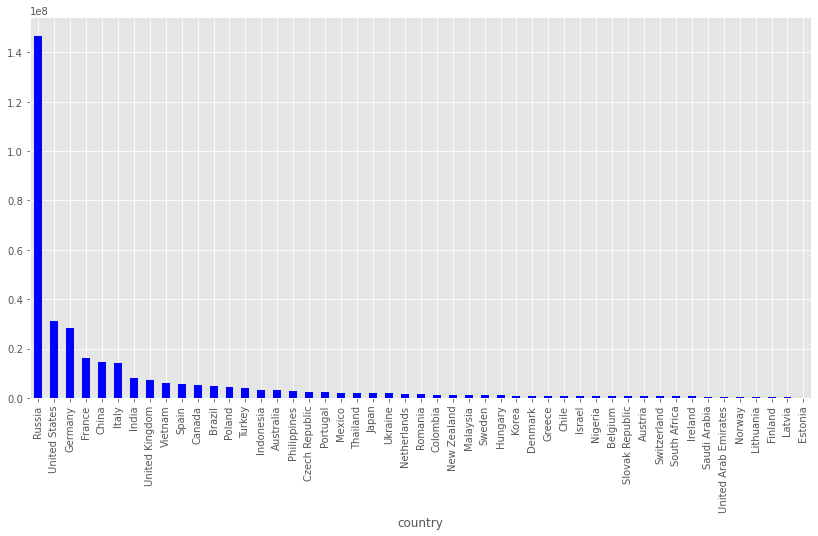

In [11]:
# Sum of User count by country
plt.figure(figsize = (14,7))
sum_Usr_cnt_ctry = pw.groupby("country")["User_count"].sum().sort_values(ascending=False).plot.bar(color = 'b')
sum_Usr_cnt_ctry.ylabel = ("User Count")

In [12]:
#list view of the sum of User count by country
sum_Usr_cnt_ctry = pw.groupby("country")["User_count"].sum().sort_values(ascending=False)
sum_Usr_cnt_ctry

country
Russia                  146837497
United States            31229262
Germany                  28364318
France                   16160255
China                    14739683
Italy                    14030845
India                     8186249
United Kingdom            7440559
Vietnam                   6026634
Spain                     5493452
Canada                    5277926
Brazil                    4943358
Poland                    4412538
Turkey                    3944162
Indonesia                 3223828
Australia                 3083341
Philippines               2750631
Czech Republic            2288530
Portugal                  2282038
Mexico                    2162221
Thailand                  2055344
Japan                     1906700
Ukraine                   1829898
Netherlands               1636625
Romania                   1509270
Colombia                  1379631
New Zealand               1367054
Malaysia                  1359725
Sweden                    1194218
Hungar

In [13]:
pw["User_count"].mean()

34685.94418367347

<p><a name="countrylengthvsttcis"></a></p>

## What is the average password length by country?

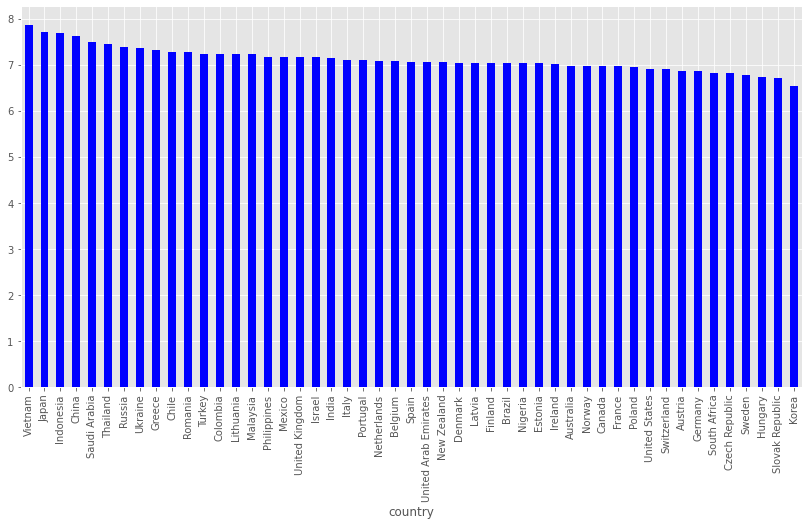

In [14]:
#WITHOUT LOG: Plot by mean password length of each country
plt.figure(figsize = (14,7))
mean_pwd_len_ctry = pw.groupby("country")["Password_Length"].mean().sort_values(ascending=False).plot.bar(color = 'b')
mean_pwd_len_ctry.ylabel = ("Password Length")

In [15]:
pw["Password_Length"].mean()

7.116224489795918

In [16]:
pw.groupby("country")["Password_Length"].mean().sort_values(ascending=False)

country
Vietnam                 7.870
Japan                   7.710
Indonesia               7.685
China                   7.620
Saudi Arabia            7.480
Thailand                7.455
Russia                  7.390
Ukraine                 7.350
Greece                  7.325
Chile                   7.280
Romania                 7.270
Turkey                  7.240
Colombia                7.235
Lithuania               7.225
Malaysia                7.220
Philippines             7.175
Mexico                  7.170
United Kingdom          7.165
Israel                  7.155
India                   7.150
Italy                   7.100
Portugal                7.095
Netherlands             7.085
Belgium                 7.085
Spain                   7.065
United Arab Emirates    7.060
New Zealand             7.050
Denmark                 7.045
Latvia                  7.040
Finland                 7.040
Brazil                  7.040
Nigeria                 7.035
Estonia                 7.025
Ir

In [ ]:
#WITH LOG: Plot by mean password length of each country
plt.figure(figsize = (14,7))
mean_pwd_len_ctry = pw.groupby("country")["Password_Length"].mean().sort_values(ascending=False).plot.bar(color = 'b')
mean_pwd_len_ctry.ylabel = ("Password Length")
plt.yscale("log")

In [ ]:
# mean password length of all countries
pw["Password_Length"].mean()

In [ ]:
#mean password length of just US
pw[pw["country_code"] == "us"]["Password_Length"].mean()

<p><a name="countryavgttcis"></a></p>

# What is the average time to crack the password by country?

In [ ]:
#WITH LOG: mean time to crack by country
plt.figure(figsize = (14,7))
pw.groupby("country")["Time_to_crack_in_seconds"].mean().sort_values(ascending=False).plot.bar(color = 'r')

plt.yscale("log")

In [ ]:
pw["Time_to_crack_in_seconds"].mean()

In [ ]:
pw.groupby("country")["Time_to_crack_in_seconds"].mean().sort_values(ascending=False)

In [ ]:
#WITHOUT LOG: mean time to crack by country
#Will not be using this, as it's difficult to see what's happening here due to most of the time to crack being 0 or close to 0
plt.figure(figsize = (14,7))
pw.groupby("country")["Time_to_crack_in_seconds"].mean().sort_values(ascending=False).plot.bar(color = 'r')

In [ ]:
#mean time to crack in seconds of all countries in 2020
pw["Time_to_crack_in_seconds"].mean()

In [ ]:
#mean time to crack in seconds of each countries in 2020
country_avg_TTCIS = pw.groupby("country")["Time_to_crack_in_seconds"].mean()
country_avg_TTCIS

<p><a name="countrysharetoppass"></a></p>

## Do different countries share same top used passwords (Top 3)

In [ ]:
pw

In [ ]:
df1 = pw.groupby(["country"])
df2 = df1.apply(lambda x: x.sort_values(["User_count"]))
df3 = df2.reset_index(drop=True)
df4 = df3.groupby("country").head(1)
df5 = df4.sort_values("User_count", ascending = False)
df5.to_csv("df5.csv")

In [ ]:
(len(df4["Password"].unique())

In [ ]:
toppwdbycountry = pw.groupby(["country", "Password"])["User_count"].max().sort_values(ascending = False)
toppwdbycountry.to_csv("toppwdbycountry.csv")b
toppwdbycountry

Since there are some of the same passwords on list, analyze by unique passwords

<p><a name="uniqpwd"></a></p>


# -------- Analysis of unique passwords --------

**Finding unique passwords from list**

In [ ]:
#dropping duplicates passwords from the list
pw.drop_duplicates(subset= ["Password"], keep = 'first', inplace = True)
pw

In [ ]:
pw["Password_Length"].mean()

In [ ]:
pw.groupby("Password")["User_count"].max().sort_values(ascending = False)

<p><a name="uniqdissect"></a></p>

## Dissecting unique passwords by character type

**Create bool columns based on if they meet password criteria. Only focusing on unique passwords**

In [ ]:
special_char = "!@#$%^&*()-+?_=,<>/"
numbers = "1234567890"
upper = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lower = "abcdefghijklmnopqrstuvwxyz"


def hasUpper(x):
    for i in range(len(x)):
        if x[i] in upper:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasLower(x):
    for i in range(len(x)):
        if x[i] in lower:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasNum(x):
    for i in range(len(x)):
        if x[i] in numbers:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasSpec(x):
    for i in range(len(x)):
        if x[i] in special_char:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def Len_Over_12(Password_Length):
    if Password_Length > 12:
        return True
        if i != len(Password_Length):
            i+=1
    else:
        return False



pw["Has_Upper"] = pw["Password"].apply(lambda x: hasUpper(x))
pw["Has_Lower"] = pw["Password"].apply(lambda x: hasLower(x))
pw["Has_Num"] = pw["Password"].apply(lambda x: hasNum(x))
pw["Has_Special_Char"] = pw["Password"].apply(lambda x: hasSpec(x))
pw["Has_len_Over12"] = pw["Password_Length"].apply(lambda x: Len_Over_12(x))

In [ ]:
pw

**Adding Password complexity column that counts True by row**

In [ ]:
pw["Password_Complexity"] = pw.Has_Upper.astype(int) + pw.Has_Lower.astype(int) + pw.Has_Num.astype(int) + pw.Has_Special_Char.astype(int) + pw.Has_len_Over12.astype(int)

In [ ]:
pw

In [ ]:
#Overall password complexity mean of all countries
pw["Password_Complexity"].mean()

In [ ]:
#Password complexity mean of each countries
country_avg_complex = pw.groupby("country")["Password_Complexity"].mean()
country_avg_complex

**Find the number of passwords based on password type + their statistical details**

---------- ******** ----------<br>
Upper Case Passwords<br>
---------- ******** ----------

In [ ]:
#Only all upper case passwords
onlyUpPwd = pw.loc[(pw.Has_Upper == True) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
onlyUpPwd

In [ ]:
len_onlyUpPwd = len(onlyUpPwd)
len_onlyUpPwd

In [ ]:
onlyUpPwd.describe()

---------- ******** ----------<br>
Lower Case Passwords<br>
---------- ******** ----------

In [ ]:
#Only all lower case passwords
onlyLowPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == True) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
onlyLowPwd

In [ ]:
len_onlyLowPwd= len(onlyLowPwd)
len_onlyLowPwd

In [ ]:
onlyLowPwd.describe()

---------- ******** ----------<br>
Number Passwords<br>
---------- ******** ----------

In [ ]:
#paswords that are soley numbers
onlyNumPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==True) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
onlyNumPwd

In [ ]:
len_onlyNumPwd = len(onlyNumPwd)
len_onlyNumPwd

In [ ]:
onlyNumPwd.describe()

---------- ******** ----------<br>
Special Char Passwords<br>
---------- ******** ----------

In [ ]:
#passwords that are soley special chacters
onlySpePwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==True) & (pw.Has_len_Over12 == False)]
onlySpePwd

In [ ]:
len_onlySpePwd= len(onlySpePwd)
len_onlySpePwd

---------- ******** ----------<br>
Other Language Passwords<br>
---------- ******** ----------

In [ ]:
#Other language password
otherPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
otherPwd

In [ ]:
len_otherPwd = len(otherPwd)
len_otherPwd

---------- ******** ----------<br>
Strong Passwords<br>
---------- ******** ----------

In [ ]:
# finding passwords that meet all strong reqs : 0 found
strongest_pwd = pw.loc[(pw.Has_Upper == True) & (pw.Has_Lower == True) & (pw.Has_Num ==True) & (pw.Has_Special_Char ==True) & (pw.Has_len_Over12 == True)]
strongest_pwd

<p><a name="pwdcomplex"></a></p>

# ------- Analysis by Password Complexity ------- 

In [ ]:
# since there isn't a password that means all 5 requirements (Strongest), finding them meeting 4
pw[pw["Password_Complexity"] == 4]

**Stats of the most complex passwords - (Complex 4)**

In [ ]:
#AVG time to crack in seconds of passwords with number 4 complexity
pwd_Complex4 = round((pw[pw["Password_Complexity"] == 4]["Time_to_crack_in_seconds"].mean()), 0)
pwd_Complex4

In [ ]:
#AVG length of passwords with number 4 complexity
pw[pw["Password_Complexity"] == 4]["Password_Length"].mean()

**Stats of the least complex passwords - (Complex 1)**

In [ ]:
#AVG time to crack in seconds of passwords with number 1 complexity
pwd_Complex1 = round((pw[pw["Password_Complexity"] == 1]["Time_to_crack_in_seconds"].mean()), 0)               
pwd_Complex1

In [ ]:
#AVG length of passwords with number 1 complexity
pw[pw["Password_Complexity"] == 1]["Password_Length"].mean()

**Comparision between Complex 1 and Complex 4 and their Mean Time to Crack in Seconds**

- PC1 - Password Complex 1
- PC4 - Password Compled 4

This graph shows us that PC4 takes a lot longer to crack compared to PC1

In [ ]:
x = ["PC 1", "PC 4"]
y = [pwd_Complex1, pwd_Complex4]
plt.figure(figsize=(10, 7))
plt.bar(x, y, color=['red', 'green'])

plt.xlabel('Password Complexity')
plt.ylabel('Mean Time to crack in seconds')

# Have to log otherwise PC1 is not shown
plt.yscale("log")

**Comparing password complexity vs time to crack of each country**

-------

<p><a name="strongpwdele"></a></p>

## Comparing the elements that make a strong password using boxplot

**Taking the log of password crack by seconds column to use for boxplot**

In [ ]:
pw["Log_of_TTCIS"] = np.log(pw["Time_to_crack_in_seconds"]+1)

In [ ]:
pw

In [ ]:
plt.figure(figsize = (14,7))
pw.boxplot(column=['Has_Upper', 'Has_Lower', 'Has_Num', "Has_Special_Char", "Has_len_Over12"]) 

---------- ******** ----------<br>
Has Uppercase Characters<br>
---------- ******** ----------

In [ ]:
bp_Up = pw.boxplot(['Log_of_TTCIS'], by="Has_Upper")


In [ ]:
bp_Up.describe()

---------- ******** ----------<br>
Has Lowercase Characters<br>
---------- ******** ----------

In [ ]:
bp_Low = pw.boxplot(['Log_of_TTCIS'], by="Has_Lower")

---------- ******** ----------<br>
Has Numbers <br>
---------- ******** ----------

In [ ]:
pw.boxplot(['Log_of_TTCIS'], by='Has_Num')

---------- ******** ----------<br>
Has Special Characters<br>
---------- ******** ----------

In [ ]:
pw.boxplot(['Log_of_TTCIS'], by="Has_Special_Char")

---------- ******** ----------<br>
Has Password Length Over 12 <br>
---------- ******** ----------

In [ ]:
pw.boxplot(['Log_of_TTCIS'], by="Has_len_Over12")

**Plotting Password Complexity vs Time to Crack in Seconds by Country**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dd=pd.melt(pw,id_vars=['country'],value_vars=['Password_Complexity','Time_to_crack_in_seconds'],var_name='Passwords')
sns.boxplot(x='country',y='value',data=dd,hue='Passwords')
plt.yscale("log")

In [ ]:
pw.boxplot('Password_Complexity', by='Time_to_crack_in_seconds')


<p><a name="onecomplextype"></a></p>

## Of the unique passwords, what percentage has only one complexity type

In [ ]:
# Pie chart of unique passwords by character type
two_type = len(pw) - (len_onlyUpPwd+ len_onlyLowPwd+ len_onlyNumPwd+ len_onlySpePwd + len_otherPwd)

pie_chart_arr = np.array([len_onlyUpPwd, len_onlyLowPwd, len_onlyNumPwd, len_otherPwd, two_type])
#pie_chart_arr = np.array([5, 6872, 1295, 2, 2921])
pie_chart_label = ["Only Uppercase", "Only Lowercase", "Only Numbers", "Other", "2+ type"]
explode = (0.2, 0.2, 0.2, 0.2, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(pie_chart_arr, explode=explode, labels = pie_chart_label, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
onlyLowPwd["Time_to_crack_in_seconds"].describe()

In [ ]:
(~pw["Has_Upper"]).values.sum()

In [ ]:
pw["Has_Upper"].values.sum()

In [ ]:
pw["Has_Lower"].values.sum()

<p><a name="TTCISbyyear"></a></p>

## Of the unique passwords in the list, has the crack time changed from the past years? [do passwords get easier to crack over time?]

---------- ******** ----------<br>
Year: 2020<br>
---------- ******** ----------

In [ ]:
# mean TTIS for year 2020
df20_mean_TTIS = pw["Time_to_crack_in_seconds"].mean()
df20_mean_TTIS

---------- ******** ----------<br>
Year: 2019<br>
---------- ******** ----------

In [ ]:
#CSV of the year 2019
p19 = pd.read_csv('U_password_crack_time_2019.csv')
p19

In [ ]:
# mean time to crack for year 2019
df19_mean_TTIS = p19["Time_to_crack_in_seconds"].mean()
df19_mean_TTIS

---------- ******** ----------<br>
Year: 2018<br>
---------- ******** ----------

In [ ]:
#CSV of the year 2018
p18 = pd.read_csv('U_password_crack_time_2018.csv')
p18

In [ ]:
# mean time to crack for year 2018
df18_mean_TTIS = p18["Time_to_crack_in_seconds"].mean()
df18_mean_TTIS

---------- ******** ----------<br>
Year: 2017<br>
---------- ******** ----------

In [ ]:
# CSV for year 2017
p17 = pd.read_csv('U_password_crack_time_2017.csv')
p17

In [ ]:
# mean time to crack for year 2017
df17_mean_TTIS = p17["Time_to_crack_in_seconds"].mean()
df17_mean_TTIS

---------- ******** ----------<br>
Year: 2016<br>
---------- ******** ----------

In [ ]:
# CSV for year 2016
p16 = pd.read_csv('U_password_crack_time_2016.csv')
p16

In [ ]:
# mean time to crack for year 2016
df16_mean_TTIS = p16["Time_to_crack_in_seconds"].mean()
df16_mean_TTIS

---------- ******** ----------<br>
Year: 2015<br>
---------- ******** ----------

In [ ]:
# CSV for year 2015
p15 = pd.read_csv('U_password_crack_time_2015.csv')
p15

In [ ]:
# mean time to crack for year 2015
df15_mean_TTIS = p15["Time_to_crack_in_seconds"].mean()
df15_mean_TTIS

In [ ]:
3642.84 5472.56

**Plotting Average Crack Time for the Password Set Over Past 5 Years**

Seems to be getting faster to crack the password every year

In [ ]:
#Plotting to see TTIS trend over time
x = [2015,2016,2017,2018,2019,2020]
y =[df15_mean_TTIS, df16_mean_TTIS, df17_mean_TTIS, df18_mean_TTIS, df19_mean_TTIS, df20_mean_TTIS]
plt.plot(x,y)

In [ ]:
#Percentage change from 2015 to 2020
percent_15to20 = ((df20_mean_TTIS - df15_mean_TTIS) / df20_mean_TTIS) * 100
percent_15to20

In [ ]:
x = ["2015", "2020"]
y = [df15_mean_TTIS, df20_mean_TTIS]
plt.figure(figsize=(10, 7))
plt.bar(x, y, color=['red', 'green'])

plt.xlabel('Years')
plt.ylabel('Mean Time to crack in seconds')

# Have to log otherwise PC1 is not shown


# Is there a change in average length of password by years?

In [ ]:
pwd2019 = pd.read_csv("2019 - 200 passwords.csv")
pwd2019

In [ ]:
#create a new column for password length
pwd2019["Password_Length"] = pwd2019["Password"].apply(len)
pwd2019

In [ ]:
pwd2019["Password_Length"].mean()

# conclusion

See how the average password length changes over time

See if there is any correlation between top trending words/hashtags and passwords